In [253]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles
from matplotlib_venn import venn3, venn3_circles
import pandas as pd
import numpy as np

%matplotlib inline

In [161]:
wk_dir = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/Venn'

## ChIP-seq peak annotated genes
- CD4 - Stat3 - IL21 (in vitro)
- CD8 - Stat5 - Il2 (in vitro)

In [2]:
stat3_cd4_file = '/media/pipkin/Rocket2/T_Cell_ChIP/202012_ChIP/3_peak_annotations/2017_PNAS_Li___STAT3_IL21-CD4_annoDf.csv'
stat3_cd4_df = pd.read_csv(stat3_cd4_file, index_col=0)
stat3_cd4_genes = set([x for x in stat3_cd4_df['SYMBOL'] if str(x) != 'nan'])

stat5_cd8_file = '/media/pipkin/Rocket2/T_Cell_ChIP/202012_ChIP/3_peak_annotations/2017_PNAS_Li___STAT5B_IL2-CD8_annoDf.csv'
stat5_cd8_df = pd.read_csv(stat5_cd8_file, index_col=0)
stat5_cd8_genes = set([x for x in stat5_cd8_df['SYMBOL'] if str(x) != 'nan'])

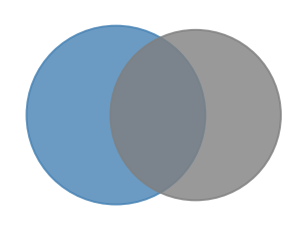

In [263]:
out_name = '/Stat3-CD4_Stat5-CD8_genes_overlap.png'

v = venn2_circles([stat3_cd4_genes, stat5_cd8_genes], alpha=0.8)
v[0].set_color('steelblue')
v[1].set_color('gray')

plt.savefig(wk_dir + out_name)

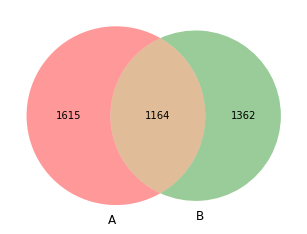

In [264]:
out_name = '/Stat3-CD4_Stat5-CD8_genes_overlap_numbers.png'
venn2([stat3_cd4_genes, stat5_cd8_genes])
plt.savefig(wk_dir + out_name)

In [4]:
il2_48h_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/2_IL2RAKO_Nascent/3_DEseq2/WT_48h_vs_KO_48h.csv'
il2_48h_df = pd.read_csv(il2_48h_file, index_col=0)
il2_48h_df_sig = il2_48h_df[il2_48h_df['padj'] < 0.05]
il2_48h_promoted = set(il2_48h_df_sig[il2_48h_df_sig['log2FoldChange'] > 0].index.tolist())
il2_48h_repressed = set(il2_48h_df_sig[il2_48h_df_sig['log2FoldChange'] < 0].index.tolist())

## IL2-Stat5 promoted / repressed genes

In [5]:
il2_stat5_repressed_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/Il2-stat5_direct_repressed.csv'
il2_stat5_promoted_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/Il2-stat5_direct_promoted.csv'

il2_stat5_repressed_df = pd.read_csv(il2_stat5_repressed_file, index_col=0)
il2_stat5_promoted_df = pd.read_csv(il2_stat5_promoted_file, index_col=0)

il2_stat5_repressed = set([x for x in il2_stat5_repressed_df['gene_name'] if str(x) != 'nan'])
il2_stat5_promoted = set([x for x in il2_stat5_promoted_df['gene_name'] if str(x) != 'nan'])

## Arm v.s. Cl13 all up / down regulated
- Arm uprgulated & promoted by IL2-Stat5
- Cl13 upregulated & repressed by IL2-Stat5

In [6]:
avc_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/0_Scanpy_out_resampled/2_DE/Arm_vs_Cl13/A/A_vs_C_differential.csv'
avc_df = pd.read_csv(avc_file)
avc_df_sig = avc_df[avc_df['t-test_padj'] <= 0.05]
a_genes = set(avc_df_sig[avc_df['t-test_logfc'] > 0]['gene_names'].tolist())
c_genes = set(avc_df_sig[avc_df['t-test_logfc'] < 0]['gene_names'].tolist())

il2_stat5_promoted_a_genes = il2_stat5_promoted & a_genes
il2_stat5_repressed_c_genes = il2_stat5_repressed & c_genes

<ipython-input-6-813462d7c12d>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a_genes = set(avc_df_sig[avc_df['t-test_logfc'] > 0]['gene_names'].tolist())
<ipython-input-6-813462d7c12d>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  c_genes = set(avc_df_sig[avc_df['t-test_logfc'] < 0]['gene_names'].tolist())


## Type I Interferon regulated genes from GO terms

In [7]:
go_type1_ifn_file1 = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/GO_term_0034340.txt'
go_type1_ifn_file2 = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/9_Figures/9_Meta/GO_term_0060337.txt'
go_type1_ifn_df1 = pd.read_csv(go_type1_ifn_file1, sep='\t')
go_type1_ifn_df2 = pd.read_csv(go_type1_ifn_file2, sep='\t')
type1_ifn_genes = go_type1_ifn_df1.iloc[:, 0].tolist() + go_type1_ifn_df2.iloc[:, 0].tolist()
type1_ifn_genes = set(type1_ifn_genes)
type1_ifn_genes

{'Adar',
 'Cactin',
 'Cdc37',
 'Cnot7',
 'Dcst1',
 'Fadd',
 'Gm45717',
 'Hsp84-2',
 'Ifitm1',
 'Ifitm2',
 'Ifitm3',
 'Ifitm6',
 'Ifitm7',
 'Ifna1',
 'Ifnar1',
 'Ifnar2',
 'Ifnb1',
 'Ikbke',
 'Irak1',
 'Irf3',
 'Irf7',
 'Isg15',
 'Lsm14a',
 'Mavs',
 'Mettl3',
 'Mmp12',
 'Mul1',
 'Myd88',
 'Nlrc5',
 'Oas2',
 'Oas3',
 'Ptpn2',
 'Samhd1',
 'Setd2',
 'Shfl',
 'Shmt2',
 'Smpd1',
 'Stat1',
 'Stat2',
 'Tbk1',
 'Trex1',
 'Trim56',
 'Trim6',
 'Ttll12',
 'Ube2k',
 'Usp18',
 'Wnt5a',
 'Ythdf2',
 'Ythdf3',
 'Zbp1'}

## Stat3 binding genes & Il2-stat5 promoted overlap

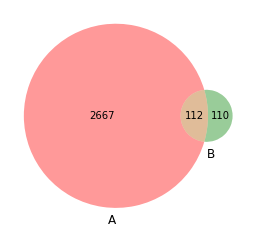

In [8]:
venn2([stat3_cd4_genes, il2_stat5_promoted])

## Stat3 binding genes & Il2-stat5 repressed overlap

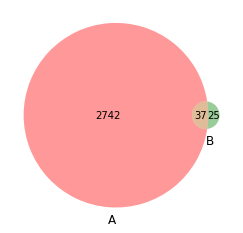

In [9]:
venn2([stat3_cd4_genes, il2_stat5_repressed])

## Stat3 binding genes & Il2-stat5 promoted in Arm overlap

Il2 stat5 promoted in Arm & Stat3 binding Overlap:
{'Eps8', 'Klf7', 'Atp11b', 'Treml2', 'Atp2b4', 'Il7r', 'Batf3', 'Slc2a3', 'Ccr5', 'Znrf2', 'Wwp1', 'Tgfbr3', 'Crim1', 'Gzmb', 'Dpy19l3', 'Slco3a1', 'Rgs1', 'Diaph1', 'Rap1gds1', 'Slc4a7', 'F2rl2', 'Gng12', 'Spef2', 'Chd7'}
----------
Il2 stat5 promoted in Arm but not Stat3 binding:
{'Rev3l', 'Ankib1', 'Dipk2a', 'Nedd4l', 'Tle1', 'Rhoq', 'Golim4', 'Acsl4', 'Pde7a', 'Ctla2a', 'Tmem108', 'Notch2', 'Fnip1', 'Lamc1', 'Emilin2'}


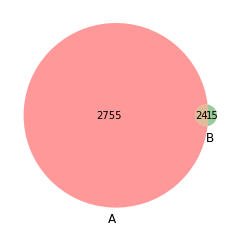

In [10]:
venn2([stat3_cd4_genes, il2_stat5_promoted_a_genes])
print("Il2 stat5 promoted in Arm & Stat3 binding Overlap:")
print(stat3_cd4_genes & il2_stat5_promoted_a_genes)
print("----------")
print("Il2 stat5 promoted in Arm but not Stat3 binding:")
print(il2_stat5_promoted_a_genes - stat3_cd4_genes)

## Stat3 binding genes & Il2-stat5 repressed in Cl13 overlap

Il2 stat5 repressed and highly expressed in Cl13 & Stat3 binding Overlap:
{'Ifi213', 'Traf1', 'Ifit3b', 'Gbp4', 'Slfn2', 'Tnfsf8', 'Bcl3', 'Id3', 'Bcl2l11', 'Ttc39b', 'Ifit3', 'Irf9', 'Bcl6', 'Slamf6', 'Serpinb9', 'Myo1e', 'Ppp1r16b', 'Il6st', 'Gpr18', 'Adora2a', 'Tox2'}
----------
Il2 stat5 repressed and highly expressed in Cl13 but not Stat3 binding:
{'Atg16l2', 'Atp9a', 'Nrip1', 'Wars', 'Frmd4a', 'Rasgef1b', 'Tnfsf11', 'Gfod1', 'Mcoln2', 'Pou2f2'}


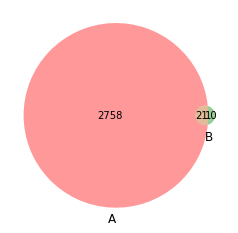

In [11]:
venn2([stat3_cd4_genes, il2_stat5_repressed_c_genes])
print("Il2 stat5 repressed and highly expressed in Cl13 & Stat3 binding Overlap:")
print(stat3_cd4_genes & il2_stat5_repressed_c_genes)
print("----------")
print("Il2 stat5 repressed and highly expressed in Cl13 but not Stat3 binding:")
print(il2_stat5_repressed_c_genes - stat3_cd4_genes)

## Type1 interferon related genes & Il2-stat5 promoted overlap

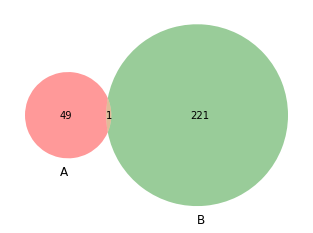

In [12]:
venn2([type1_ifn_genes, il2_stat5_promoted])

## Type1 interferon related genes & Il2-stat5 repressed overlap

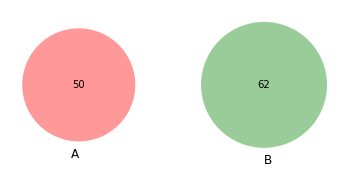

In [13]:
venn2([type1_ifn_genes, il2_stat5_repressed])

### To do
*Tstem Cl13 > Arm genes -- IL2 repressed -- Stat3 binding*

In [240]:
tstem_cl13_arm = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/0_Scanpy_out_resampled/2_DE/perCluster_Arm_vs_Cl13/P7/A/A_vs_C_differential.csv'
tstem_cl13_arm_df = pd.read_csv(tstem_cl13_arm)

In [241]:
tstem_cl13_arm_df_sig = tstem_cl13_arm_df[tstem_cl13_arm_df['t-test_padj'] <= 0.3]
tstem_cl13_genes = tstem_cl13_arm_df_sig[tstem_cl13_arm_df_sig['t-test_logfc'] <  0]['gene_names'].tolist()
tstem_cl13_genes = set(tstem_cl13_genes)
tstem_arm_genes = tstem_cl13_arm_df_sig[tstem_cl13_arm_df_sig['t-test_logfc'] >  0]['gene_names'].tolist()
tstem_arm_genes = set(tstem_arm_genes)

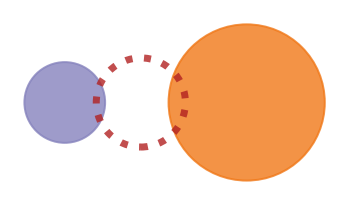

In [246]:
out_name = '/Tstem_arm-cl13_il2_stat5_promoted.png'

tstem_arm_il2_stat5_promoted = tstem_arm_genes & il2_stat5_promoted
tstem_cl13_il2_stat5_promoted = tstem_cl13_genes & il2_stat5_promoted
v = venn3_circles([tstem_arm_genes, tstem_cl13_genes, il2_stat5_promoted], alpha=0.8)
v[0].set_color(plt.cm.Purples(0.6))
v[1].set_color(plt.cm.YlOrBr(0.6))
v[2].set_ls(':')
v[2].set_lw(7)
v[2].set_edgecolor('firebrick')

plt.savefig(wk_dir + out_name)

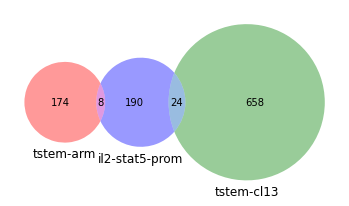

In [247]:
out_name = '/Tstem_arm-cl13_il2_stat5_promoted_numbers.png'

venn3([tstem_arm_genes, tstem_cl13_genes, il2_stat5_promoted], 
      set_labels=['tstem-arm','tstem-cl13', 'il2-stat5-prom'])

plt.savefig(wk_dir + out_name)

0.625
{'Ccr5', 'Znrf2', 'Crim1', 'Il7r', 'Slco3a1'}


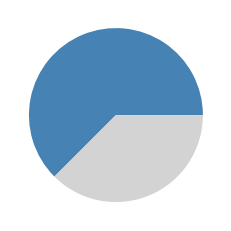

In [248]:
out_name = '/Tstem_arm_il2_stat5_promoted_stat3_pctg.png'

tstem_arm_il2_stat5_promoted_stat3 = tstem_arm_il2_stat5_promoted & stat3_cd4_genes
stat3_pctg = len(tstem_arm_il2_stat5_promoted_stat3) / len(tstem_arm_il2_stat5_promoted)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue','lightgray'])
print(stat3_pctg)
print(tstem_arm_il2_stat5_promoted_stat3)

plt.savefig(wk_dir + out_name)

0.6666666666666666
{'Oxsr1', 'Ptprj', 'Icos', 'Stk39', 'Coro2a', 'Ifng', 'Neb', 'Tnfaip8', 'Slc39a10', 'Zfp608', 'Zc3hav1l', 'Tab2', 'Gpd2', 'Twsg1', 'Tcf4', 'Hif1a'}


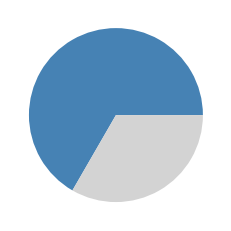

In [249]:
out_name = '/Tstem_cl13_il2_stat5_promoted_stat3_pctg.png'

tstem_cl13_il2_stat5_promoted_stat3 = tstem_cl13_il2_stat5_promoted & stat3_cd4_genes
stat3_pctg = len(tstem_cl13_il2_stat5_promoted_stat3) / len(tstem_cl13_il2_stat5_promoted)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue','lightgray'])
print(stat3_pctg)
print(tstem_cl13_il2_stat5_promoted_stat3)

plt.savefig(wk_dir + out_name)

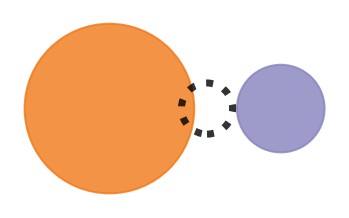

In [237]:
out_name = '/Tstem_arm-cl13_il2_stat5_repressed.png'

tstem_cl13_il2_stat5_repressed = tstem_cl13_genes & il2_stat5_repressed
tstem_arm_il2_stat5_repressed = tstem_arm_genes & il2_stat5_repressed
v = venn3_circles([tstem_arm_genes, tstem_cl13_genes, il2_stat5_repressed], alpha=0.8)
v[0].set_color(plt.cm.Purples(0.6))
v[1].set_color(plt.cm.YlOrBr(0.6))
v[2].set_ls(':')
v[2].set_lw(7)
v[2].set_edgecolor('black')

plt.savefig(wk_dir + out_name)

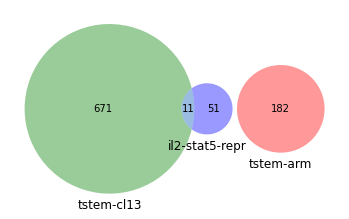

In [171]:
out_name = '/Tstem_arm-cl13_il2_stat5_repressed_numbers.png'

venn3([tstem_arm_genes, tstem_cl13_genes, il2_stat5_repressed], 
      set_labels=['tstem-arm','tstem-cl13', 'il2-stat5-repr'])

plt.savefig(wk_dir + out_name)

0.9090909090909091
{'Myo1e', 'Bcl6', 'Slamf6', 'Tnfsf8', 'Ifit3', 'Id3', 'Bcl2l11', 'Adora2a', 'Serpinb9', 'Tox2'}


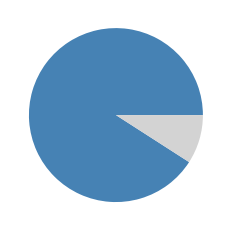

In [235]:
out_name = '/Tstem_cl13_il2_stat5_repressed_stat3_pctg.png'

tstem_cl13_il2_stat5_repressed_stat3 = tstem_cl13_il2_stat5_repressed & stat3_cd4_genes
stat3_pctg = len(tstem_cl13_il2_stat5_repressed_stat3) / len(tstem_cl13_il2_stat5_repressed)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue','lightgray'])
print(stat3_pctg)
print(tstem_cl13_il2_stat5_repressed_stat3)

plt.savefig(wk_dir + out_name)

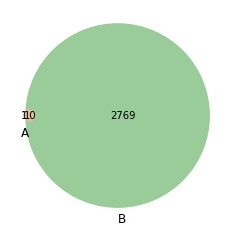

In [69]:
venn2([tstem_cl13_il2_stat5_repressed, stat3_cd4_genes])

In [16]:
tstem_cl13_il2_repressed = tstem_cl13_genes  & il2_stat5_repressed
tstem_cl13_il2_repressed

{'Adora2a',
 'Bcl2l11',
 'Bcl6',
 'Id3',
 'Ifit3',
 'Myo1e',
 'Pou2f2',
 'Serpinb9',
 'Slamf6',
 'Tnfsf8',
 'Tox2'}

In [17]:
tstem_cl13_il2_repressed & stat3_cd4_genes

{'Adora2a',
 'Bcl2l11',
 'Bcl6',
 'Id3',
 'Ifit3',
 'Myo1e',
 'Serpinb9',
 'Slamf6',
 'Tnfsf8',
 'Tox2'}

## EMP Il-2 stat5 promoted genes -- Arm versus Cl13

In [18]:
emp_cl13_arm = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/0_Scanpy_out_resampled/2_DE/perTimepoint_Arm_vs_Cl13/D5/A/A_vs_C_differential.csv'
emp_cl13_arm_df = pd.read_csv(emp_cl13_arm)

In [51]:
emp_cl13_arm_df_sig = emp_cl13_arm_df[emp_cl13_arm_df['t-test_padj'] <= 0.05]
emp_cl13_genes = emp_cl13_arm_df_sig[emp_cl13_arm_df_sig['t-test_logfc'] <  0]['gene_names'].tolist()
emp_cl13_genes = set(emp_cl13_genes)
emp_arm_genes = emp_cl13_arm_df_sig[emp_cl13_arm_df_sig['t-test_logfc'] >  0]['gene_names'].tolist()
emp_arm_genes = set(emp_arm_genes)

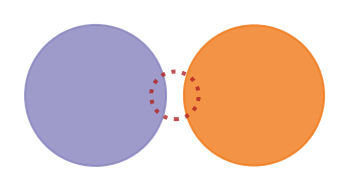

In [226]:
out_name = '/Emp_arm-cl13_il2_stat5_promoted.png'

emp_arm_il2_stat5_promoted = emp_arm_genes & il2_stat5_promoted
emp_cl13_il2_stat5_promoted = emp_cl13_genes & il2_stat5_promoted
v = venn3_circles([emp_arm_genes, emp_cl13_genes, il2_stat5_promoted], alpha=0.8)
v[0].set_color(plt.cm.Purples(0.6))
v[1].set_color(plt.cm.YlOrBr(0.6))
v[2].set_ls(':')
v[2].set_lw(4)
v[2].set_edgecolor('firebrick')

plt.savefig(wk_dir + out_name)

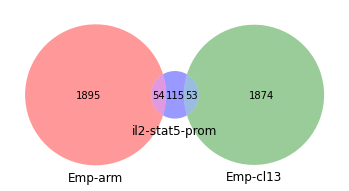

In [172]:
out_name = '/Emp_arm-cl13_il2_stat5_promoted_numbers.png'

venn3([emp_arm_genes, emp_cl13_genes, il2_stat5_promoted],
      set_labels=['Emp-arm','Emp-cl13', 'il2-stat5-prom'])

plt.savefig(wk_dir + out_name)

0.6226415094339622
{'Stk39', 'Coro2a', 'Cytip', 'Ifng', 'Gpd2', 'Il18r1', 'Hif1a', 'Oxsr1', 'Atxn7l1', 'Fam49b', 'Rnf19b', 'Otulin', 'Twsg1', 'Cd2', 'Dpy19l3', 'Crem', 'Icos', 'Tnfaip8', 'Fam71b', 'Pfkp', 'Tet2', 'Zfp608', 'Tcf4', 'Fndc3a', 'Pigk', 'Slc4a7', 'Ptprj', 'Prnp', 'Plxnc1', 'Ttc39c', 'Tab2', 'Tes', 'Rbpj'}


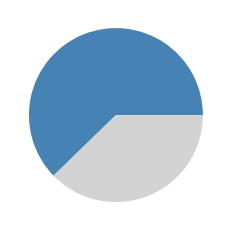

In [233]:
out_name = '/Emp_cl13_il2_stat5_promoted_stat3_pctg.png'

emp_cl13_il2_stat5_promoted_stat3 = emp_cl13_il2_stat5_promoted & stat3_cd4_genes
stat3_pctg = len(emp_cl13_il2_stat5_promoted_stat3) / len( emp_cl13_il2_stat5_promoted)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue', 'lightgray'])

print(stat3_pctg)
print(emp_cl13_il2_stat5_promoted_stat3)

plt.savefig(wk_dir + out_name)

0.5740740740740741
{'Eps8', 'Klf7', 'Setbp1', 'B4galnt4', 'Treml2', 'Atp2b4', 'Il7r', 'Vrk1', 'Fgd2', 'Batf3', 'Ccr5', 'Znrf2', 'Wwp1', 'Tgfbr3', 'Crim1', 'Selp', 'Osm', 'Gzmb', 'Slco3a1', 'Rgs1', 'Pcgf5', 'Erp44', 'Ppp1r3b', 'Rap1gds1', 'Ift57', 'Zc3hav1l', 'Gng12', 'Socs2', 'Spef2', 'Tnfrsf8', 'Chd7'}


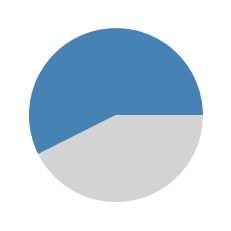

In [234]:
out_name = '/Emp_arm_il2_stat5_promoted_stat3_pctg.png'

emp_arm_il2_stat5_promoted_stat3 = emp_arm_il2_stat5_promoted & stat3_cd4_genes
stat3_pctg = len(emp_arm_il2_stat5_promoted_stat3) / len( emp_arm_il2_stat5_promoted)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue', 'lightgray'])

print(stat3_pctg)
print(emp_arm_il2_stat5_promoted_stat3)

plt.savefig(wk_dir + out_name)

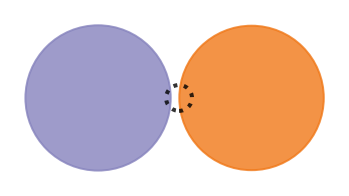

In [214]:
out_name = '/Emp_arm-cl13_il2_stat5_repressed.png'

emp_cl13_il2_stat5_repressed = emp_cl13_genes & il2_stat5_repressed
emp_arm_il2_stat5_repressed = emp_arm_genes & il2_stat5_repressed
v = venn3_circles([emp_arm_genes, emp_cl13_genes, il2_stat5_repressed], alpha=0.8)
v[0].set_color(plt.cm.Purples(0.6))
v[1].set_color(plt.cm.YlOrBr(0.6))
v[2].set_ls(':')
v[2].set_lw(4)
v[2].set_edgecolor('black')

plt.savefig(wk_dir + out_name)

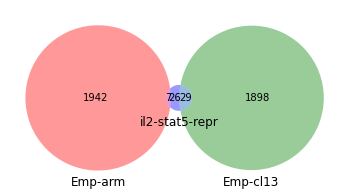

In [196]:
out_name = '/Emp_arm-cl13_il2_stat5_repressed_numbers.png'

venn3([emp_arm_genes, emp_cl13_genes, il2_stat5_repressed],
      set_labels=['Emp-arm','Emp-cl13', 'il2-stat5-repr'])

plt.savefig(wk_dir + out_name)

0.6896551724137931
{'Ifi213', 'Traf1', 'Tnfsf8', 'Slfn2', 'Bcl2l11', 'Ifi214', 'Ttc39b', 'Arhgef3', 'Adora2a', 'Irf9', 'Bcl6', 'Slamf6', 'Serpinb9', 'Mcl1', 'Myo1e', 'Ppp1r16b', 'Il6st', 'Gpr18', 'Id3', 'Tox2'}


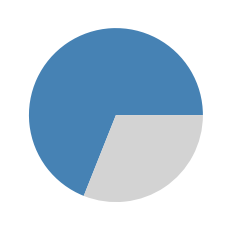

In [215]:
out_name = '/Emp_cl13_il2_stat5_repressed_stat3_pctg.png'

emp_cl13_il2_stat5_repressed_stat3 = emp_cl13_il2_stat5_repressed & stat3_cd4_genes
stat3_pctg = len(emp_cl13_il2_stat5_repressed_stat3) / len(emp_cl13_il2_stat5_repressed)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue', 'lightgray'])

print(stat3_pctg)
print(emp_cl13_il2_stat5_repressed_stat3)

plt.savefig(wk_dir + out_name)

0.5714285714285714


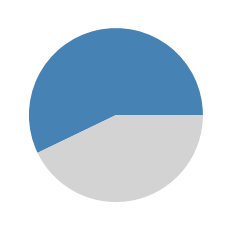

In [203]:
out_name = '/Emp_arm_il2_stat5_repressed_stat3_pctg.png'

emp_arm_il2_stat5_repressed_stat3 = emp_arm_il2_stat5_repressed & stat3_cd4_genes
stat3_pctg = len(emp_arm_il2_stat5_repressed_stat3) / len(emp_arm_il2_stat5_repressed)
plt.pie([stat3_pctg, 1-stat3_pctg], colors = ['steelblue', 'lightgray'])

print(stat3_pctg)
plt.savefig(wk_dir + out_name)

## EMP v.s. Naive - Il2-stat3

In [71]:
emp_naive_arm = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/1_Scanpy_out_resampled_ARM-NAV/2_DE/Cluster_vs_Cluster/P2/P2_vs_P0_differential.csv'
emp_naive_cl13 = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/1_Scanpy_out_resampled_Cl13-NAV/2_DE/Cluster_vs_Cluster/P2/P2_vs_P0_differential.csv'
emp_naive_arm_df = pd.read_csv(emp_naive_arm)
emp_naive_cl13_df = pd.read_csv(emp_naive_cl13)

In [77]:
emp_naive_arm_sig_df = emp_naive_arm_df[emp_naive_arm_df['t-test_padj'] <= 0.05]
emp_naive_cl13_sig_df = emp_naive_cl13_df[emp_naive_cl13_df['t-test_padj'] <= 0.05]
emp_naive_arm_up = set(emp_naive_arm_sig_df[emp_naive_arm_sig_df['t-test_logfc'] > 0]['gene_names'].tolist())
emp_naive_arm_dn = set(emp_naive_arm_sig_df[emp_naive_arm_sig_df['t-test_logfc'] < 0]['gene_names'].tolist())
emp_naive_cl13_up = set(emp_naive_cl13_sig_df[emp_naive_cl13_sig_df['t-test_logfc'] > 0]['gene_names'].tolist())
emp_naive_cl13_dn = set(emp_naive_cl13_sig_df[emp_naive_cl13_sig_df['t-test_logfc'] < 0]['gene_names'].tolist())

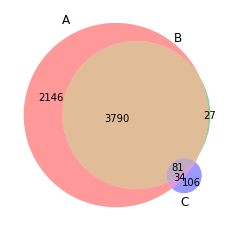

In [78]:
venn3([emp_naive_arm_up,emp_naive_cl13_up, il2_stat5_promoted])

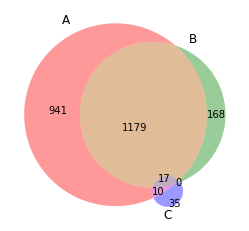

In [81]:
venn3([emp_naive_arm_dn,emp_naive_cl13_dn, il2_stat5_repressed])

## Stat3 Cd4

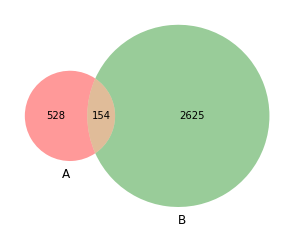

In [46]:
venn2([tstem_cl13_genes, stat3_cd4_genes])

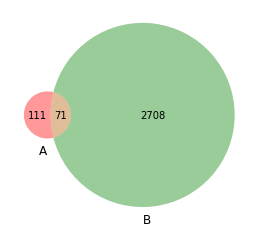

In [47]:
venn2([tstem_arm_genes, stat3_cd4_genes])

## P2 -> P7 Arm / Cl13 upregulated genes

In [160]:
arm_p7_p2_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/1_Scanpy_out_resampled_ARM-NAV/2_DE/Cluster_vs_Cluster/P7/P7_vs_P2_differential.csv'
cl13_p7_p2_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/0_Acute-Chronic/1_Scanpy/1_Scanpy_out_resampled_Cl13-NAV/2_DE/Cluster_vs_Cluster/P7/P7_vs_P2_differential.csv'
arm_p7_p2_df = pd.read_csv(arm_p7_p2_file)
cl13_p7_p2_df = pd.read_csv(cl13_p7_p2_file)

In [194]:
arm_p7_p2_sig_df = arm_p7_p2_df[arm_p7_p2_df['t-test_overestim_var_padj'] < 0.05]
cl13_p7_p2_sig_df = cl13_p7_p2_df[cl13_p7_p2_df['t-test_overestim_var_padj'] < 0.05]
arm_p7_p2_up = set(arm_p7_p2_sig_df[arm_p7_p2_sig_df['t-test_logfc'] > 1]['gene_names'].tolist())
cl13_p7_p2_up = set(cl13_p7_p2_sig_df[cl13_p7_p2_sig_df['t-test_logfc'] > 1]['gene_names'].tolist())
arm_p7_p2_dn = set(arm_p7_p2_sig_df[arm_p7_p2_sig_df['t-test_logfc'] < -1]['gene_names'].tolist())
cl13_p7_p2_dn = set(cl13_p7_p2_sig_df[cl13_p7_p2_sig_df['t-test_logfc'] < -1]['gene_names'].tolist())

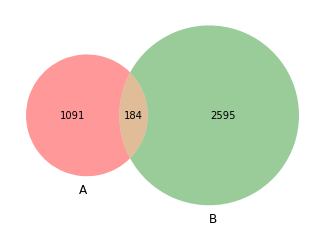

In [224]:
venn2([arm_p7_p2_dn, stat3_cd4_genes])

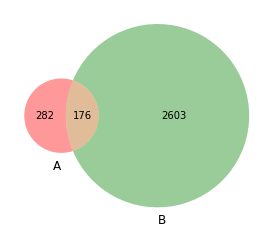

In [225]:
venn2([arm_p7_p2_up, stat3_cd4_genes])

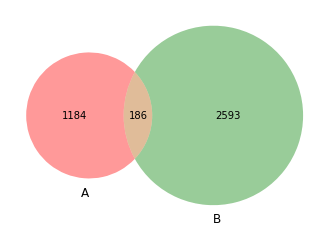

In [213]:
venn2([cl13_p7_p2_dn, stat3_cd4_genes])

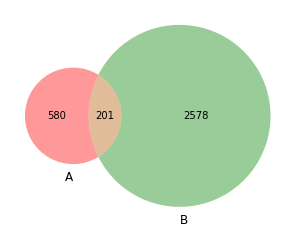

In [214]:
venn2([cl13_p7_p2_up, stat3_cd4_genes])